<a href="https://colab.research.google.com/github/mohitsingh07/-Simple-GUI-Mathematical-Calculator/blob/main/mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("/content/drive/MyDrive/assignments/minist fashion/fashion-mnist_train.csv")

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[10000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [10]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [11]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [12]:
def ReLU_deriv(Z):
    return Z > 0


In [13]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [14]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 1 6 ... 7 7 7] [9 7 6 ... 4 5 8]
0.0627
Iteration:  10
[7 1 4 ... 8 7 4] [9 7 6 ... 4 5 8]
0.21978
Iteration:  20
[7 9 4 ... 8 7 4] [9 7 6 ... 4 5 8]
0.32608
Iteration:  30
[9 9 4 ... 6 7 4] [9 7 6 ... 4 5 8]
0.4145
Iteration:  40
[9 9 4 ... 6 7 7] [9 7 6 ... 4 5 8]
0.47478
Iteration:  50
[9 9 4 ... 6 7 8] [9 7 6 ... 4 5 8]
0.51956
Iteration:  60
[9 9 4 ... 6 7 8] [9 7 6 ... 4 5 8]
0.55096
Iteration:  70
[9 9 4 ... 6 9 8] [9 7 6 ... 4 5 8]
0.57484
Iteration:  80
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.59316
Iteration:  90
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.60644
Iteration:  100
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.61664
Iteration:  110
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.62742
Iteration:  120
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.63656
Iteration:  130
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.64502
Iteration:  140
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.6526
Iteration:  150
[9 9 4 ... 2 9 8] [9 7 6 ... 4 5 8]
0.6599
Iteration:  160
[9 9 4 ... 6 9 8] [9 7 6 ... 4 5 8]
0.6

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


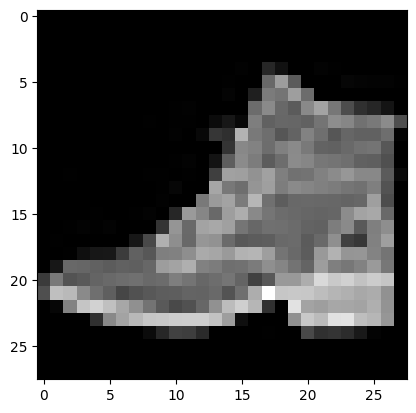

Prediction:  [9]
Label:  7


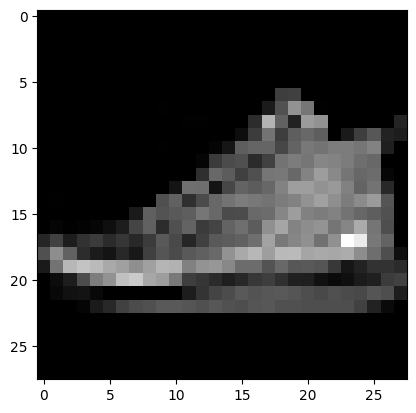

Prediction:  [0]
Label:  0


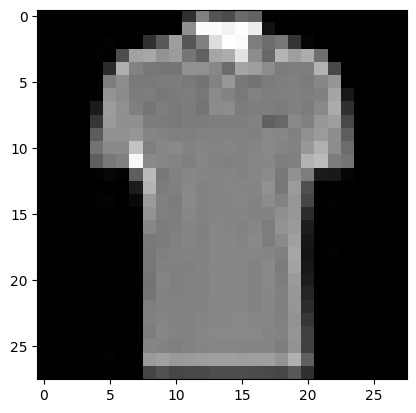

Prediction:  [8]
Label:  8


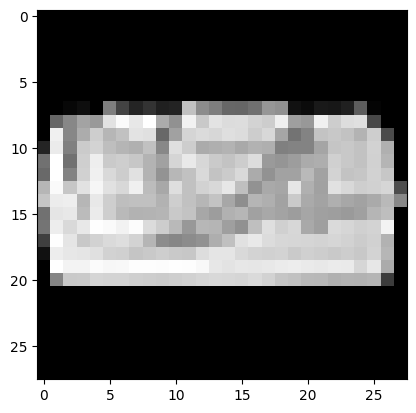

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(21, W1, b1, W2, b2)
test_prediction(34, W1, b1, W2, b2)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
